
## Feature Creation: Combine with reference feature

The CombineWithReferenceFeature() applies binary operations ['sub', 'div','add','mul'] to multiple features, returning one or more additional features as a result.

For this demonstration, we use the UCI Wine Quality Dataset.

The data is publicly available on [UCI repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)
from sklearn.pipeline import Pipeline as pipe
from sklearn.preprocessing import StandardScaler

from feature_engine.creation import CombineWithReferenceFeature
from feature_engine.imputation import MeanMedianImputer

pd.set_option('display.max_columns', None)

In [7]:
# Read data
data = pd.read_csv('winequality-red.csv', sep=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**This Data contains 11 features, all numerical, with no missing values.**

In [8]:
# Let's transform the Target, i.e Wine Quality into a binary classification problem:

bins = [0,5,10]

labels = [0, 1] # 'low'=0, 'high'=1

data['quality_range']= pd.cut(x=data['quality'], bins=bins, labels=labels)

data[['quality_range','quality']].head(5)

,quality_range,quality
0,0,5
1,0,5
2,0,5
3,1,6
4,0,5


In [9]:
# drop original target

data.drop('quality', axis=1, inplace = True)

### Sub and DIv Combinators:
Let's create two new variables:

- none_free_sulfur_dioxide = sub(total sulfur dioxide, free sulfur dioxide)
- porcentage_free_sulfur = div(total sulfur dioxide, free sulfur dioxide)

In [13]:
# Create the Combinators

sub_with_reference_feature = CombineWithReferenceFeature(
    variables_to_combine=['total sulfur dioxide'],
    reference_variables=['free sulfur dioxide'],
    operations = ['sub'],
    new_variables_names = ['none_free_sulfur_dioxide']
)

div_with_reference_feature = CombineWithReferenceFeature(
    variables_to_combine=['total sulfur dioxide'],
    reference_variables=['free sulfur dioxide'],
    operations = ['div'],
    new_variables_names = ['porcentage_free_sulfur']
)

# Fit the Sub Combinator on training data
sub_with_reference_feature.fit(data)

# Transform the data
data_t = sub_with_reference_feature.transform(data)

# We can combine both steps in a single call with ".fit_transform()" methode
data_t = div_with_reference_feature.fit_transform(data_t)

In [14]:
data_t.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_range,none_free_sulfur_dioxide,porcentage_free_sulfur
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,23.0,3.090909
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,42.0,2.680000
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,39.0,3.600000
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,43.0,3.529412
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,23.0,3.090909


#### Combine with more than 1 operation¶
We can also combine the variables with more than 1 mathematical operation. And the transformer has the option to create variable names automatically.


In [15]:
# Create the Combinators

multiple_combinator = CombineWithReferenceFeature(
    variables_to_combine=['total sulfur dioxide'],
    reference_variables=['free sulfur dioxide'],
    operations = ['sub','div'],
)

In [16]:
# Fit the Mean Combinator on training data
multiple_combinator.fit(data)

CombineWithReferenceFeature(operations=['sub', 'div'],
                            reference_variables=['free sulfur dioxide'],
                            variables_to_combine=['total sulfur dioxide'])

In [17]:
# Transform the data
data_t = multiple_combinator.transform(data)

In [18]:

# Note the 2 additional variables at the end of the dataframe
data_t.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_range,total sulfur dioxide_sub_free sulfur dioxide,total sulfur dioxide_div_free sulfur dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,23.0,3.090909
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,42.0,2.680000
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,39.0,3.600000
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,43.0,3.529412
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,23.0,3.090909


### Pipeline Example

We can put all these transformations into single pipeline:

Create new variables
Scale features
Apply simple LogisticRegression classifier to predict the wine quality range
See more on how to use Piplines in these [examples](https://github.com/solegalli/feature_engine/tree/master/examples/Pipelines)

In [19]:
X = data.drop(['quality_range'], axis=1)

y = data.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=y
                                                    )
X_train.shape, X_test.shape

((1439, 11), (160, 11))

In [20]:
value_pipe = pipe([
    # Create new features using the sub and div combinators
    ('combinator', CombineWithReferenceFeature(
    variables_to_combine=['total sulfur dioxide'],
    reference_variables=['free sulfur dioxide'],
    operations = ['sub','div'],
                                            )),

    # scale features
    ('scaler', StandardScaler()),

    # LogisticRegression
    ('LogisticRegression', LogisticRegression())
])

In [21]:
value_pipe.fit(X_train, y_train)

Pipeline(steps=[('combinator',
                 CombineWithReferenceFeature(operations=['sub', 'div'],
                                             reference_variables=['free sulfur '
                                                                  'dioxide'],
                                             variables_to_combine=['total '
                                                                   'sulfur '
                                                                   'dioxide'])),
                ('scaler', StandardScaler()),
                ('LogisticRegression', LogisticRegression())])

In [22]:
pred_train = value_pipe.predict(X_train)
pred_test = value_pipe.predict(X_test)

In [23]:
print('LogisticRegression Model train accuracy score: {}'.format(
    accuracy_score(y_train, pred_train)))
print()
print('LogisticRegression Model train accuracy score: {}'.format(
    accuracy_score(y_test, pred_test)))
    

LogisticRegression Model train accuracy score: 0.7477414871438499

LogisticRegression Model train accuracy score: 0.75625


In [24]:
print('LogisticRegression Model test classification report: \n\n {}'.format(
    classification_report(y_test, pred_test)))

LogisticRegression Model test classification report: 

               precision    recall  f1-score   support

           0       0.73      0.74      0.74        74
           1       0.78      0.77      0.77        86

    accuracy                           0.76       160
   macro avg       0.75      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



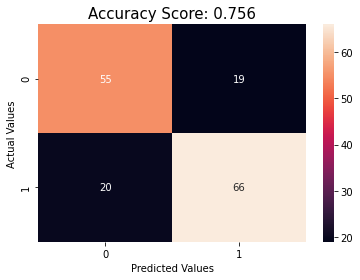

In [25]:
score = round(accuracy_score(y_test, pred_test), 3)
cm = confusion_matrix(y_test, pred_test)

sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

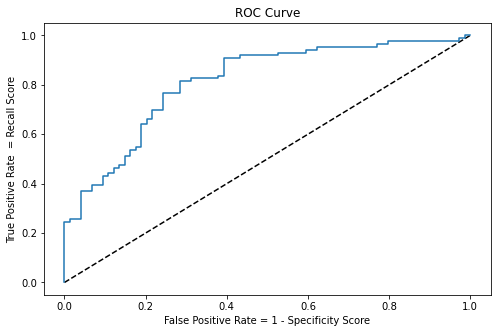

In [26]:

# Predict probabilities for the test data
probs = value_pipe.predict_proba(X_test)[:, 1]

# Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()